# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [63]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [65]:
import tensorflow as tf
from tensorflow import keras

In [66]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [68]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [69]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [70]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

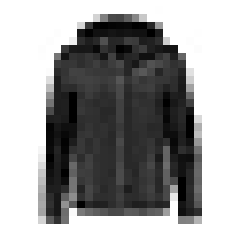

In [71]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [72]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [73]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [74]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [75]:
X_valid.shape

(5000, 28, 28)

In [76]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

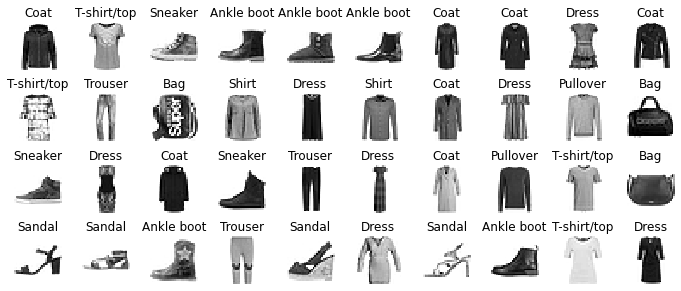

In [77]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [78]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [79]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [81]:
model.layers

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [83]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [84]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [85]:
model.get_layer(hidden1.name) is hidden1

True

In [86]:
weights, biases = hidden1.get_weights()

In [87]:
weights

array([[ 0.01200986, -0.06601295,  0.06254366, ..., -0.00449327,
        -0.06298536,  0.01749772],
       [ 0.04037467,  0.02157343,  0.04992378, ...,  0.03340643,
         0.06106953,  0.05113204],
       [-0.06242077,  0.0423476 , -0.02914558, ..., -0.01648794,
         0.04517418, -0.0059198 ],
       ...,
       [ 0.07117085, -0.04060877,  0.04136132, ..., -0.00521786,
         0.04552307, -0.04459676],
       [ 0.04401688,  0.01941486,  0.04661807, ..., -0.06789868,
         0.02686682, -0.05126208],
       [-0.05761851,  0.06059977,  0.03182549, ..., -0.00918331,
         0.03835   , -0.02371744]], dtype=float32)

In [88]:
weights.shape

(784, 300)

In [89]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [90]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [91]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [92]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7242 - accuracy: 0.7645 - val_loss: 0.5247 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4937 - accuracy: 0.8298 - val_loss: 0.4620 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4477 - accuracy: 0.8437 - val_loss: 0.4291 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4189 - accuracy: 0.8536 - val_loss: 0.3958 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3987 - accuracy: 0.8593 - val_loss: 0.3838 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3815 - accuracy: 0.8657 - val_loss: 0.3751 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3675 - accuracy: 0.8703 - val_loss: 0.3655 - val_accuracy:

In [93]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [94]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [95]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

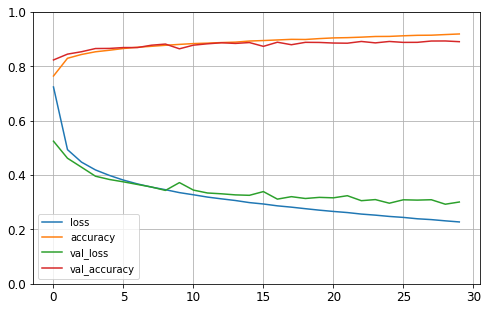

In [96]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [97]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8733


[0.3400338888168335, 0.8733000159263611]

In [98]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [99]:
y_pred = model.predict(X_new)
y_pred

array([[3.8351850e-06, 1.1409325e-06, 1.3238457e-06, 2.4969773e-07,
        1.8506238e-06, 3.1097876e-03, 8.8532588e-06, 2.0623313e-02,
        9.6550204e-05, 9.7615302e-01],
       [8.8181669e-06, 3.8069235e-08, 9.8987120e-01, 3.9231769e-09,
        8.3756568e-03, 1.0451083e-10, 1.7443594e-03, 4.6512731e-11,
        2.6514179e-08, 5.3091633e-12],
       [7.1512238e-07, 9.9999797e-01, 1.9520024e-07, 6.5411876e-07,
        3.7363088e-07, 3.3377374e-12, 1.6088509e-09, 2.2987119e-09,
        6.3003869e-10, 1.0099078e-11]], dtype=float32)

In [ ]:
#np.array([])[y_pred]

In [100]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

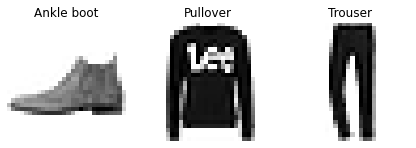

In [101]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

In [102]:
#1
list_optimizers = ["rmsprop" , "adam" ] 
list_history = []
for optim in list_optimizers :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optim,
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                        validation_data=(X_valid, y_valid))
    list_history.append(history)
    

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5024 - accuracy: 0.8191 - val_loss: 0.3734 - val_accuracy: 0.8672
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3912 - accuracy: 0.8601 - val_loss: 0.5221 - val_accuracy: 0.8074
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3674 - accuracy: 0.8711 - val_loss: 0.4174 - val_accuracy: 0.8658
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3537 - accuracy: 0.8767 - val_loss: 0.4086 - val_accuracy: 0.8786
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3461 - accuracy: 0.8821 - val_loss: 0.4174 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3337 - accuracy: 0.8848 - val_loss: 0.4121 - val_accuracy: 0.8820
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3292 - accuracy: 0.8872 - val_loss: 0.4443 - val_accuracy:

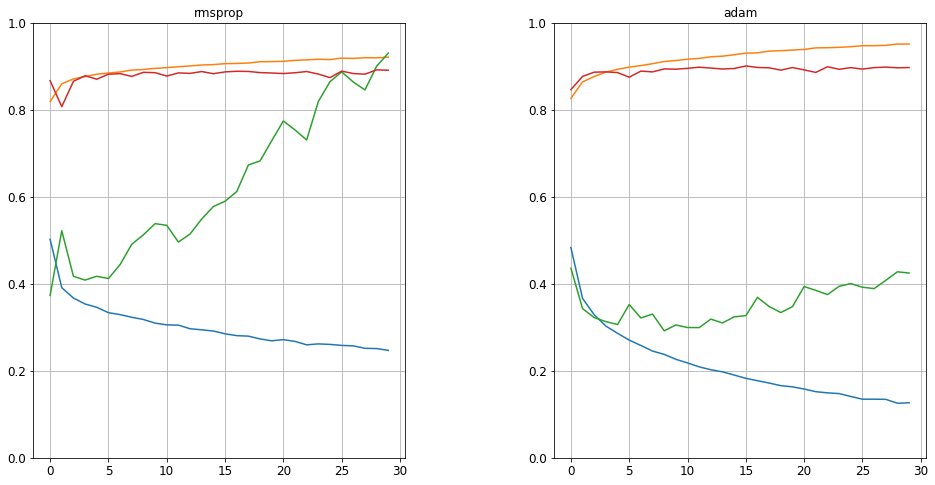

In [103]:
fig = plt.figure(figsize = (16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    ax.plot(pd.DataFrame(list_history[i-1].history))
    plt.title(list_optimizers[i-1])
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
#2
list_history = []
for i in range(5,8) :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size = 2**i , epochs=30,
                        validation_data=(X_valid, y_valid))
    list_history.append(history)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7190 - accuracy: 0.7640 - val_loss: 0.5013 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4878 - accuracy: 0.8310 - val_loss: 0.4849 - val_accuracy: 0.8284
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4431 - accuracy: 0.8446 - val_loss: 0.4079 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4160 - accuracy: 0.8547 - val_loss: 0.4068 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3958 - accuracy: 0.8596 - val_loss: 0.3909 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3797 - accuracy: 0.8654 - val_loss: 0.3727 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3665 - accuracy: 0.8705 - val_loss: 0.3787 - val_accuracy:

In [105]:
len(list_history)

3

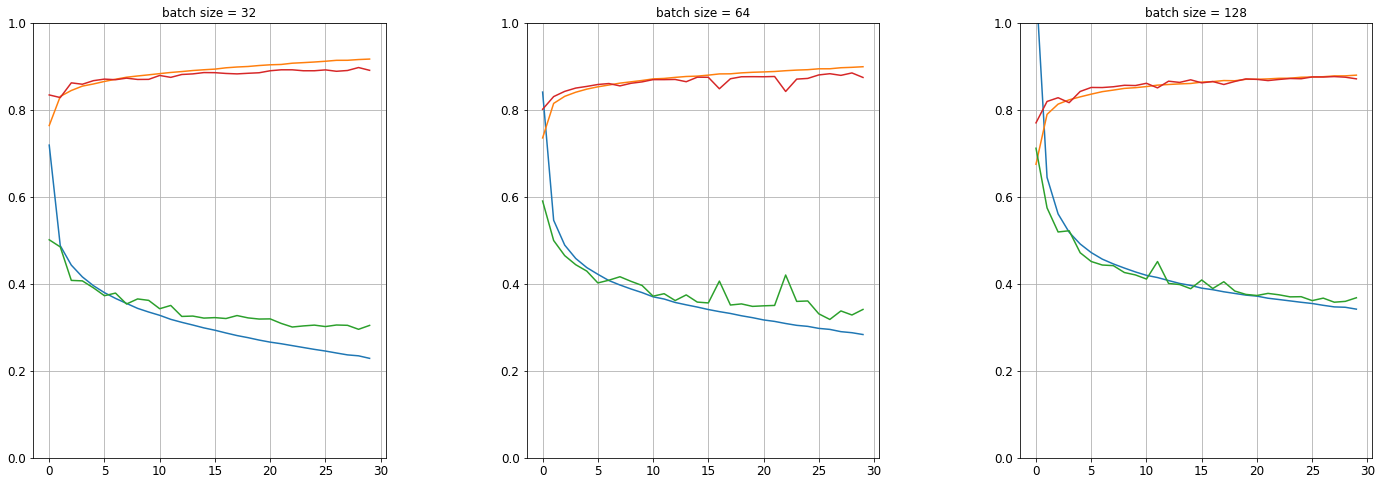

In [106]:
fig = plt.figure(figsize = (24,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    ax.plot(pd.DataFrame(list_history[i-1].history))
    size = 2**(i+4)
    plt.title("batch size = " + str(size))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
plt.show()

In [107]:
#3
list_history = []
for i in range(40,100,20) :
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size = 32 , epochs= i,
                        validation_data=(X_valid, y_valid))
    list_history.append(history)

Epoch 1/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7347 - accuracy: 0.7581 - val_loss: 0.5258 - val_accuracy: 0.8214
Epoch 2/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8281 - val_loss: 0.4473 - val_accuracy: 0.8496
Epoch 3/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4474 - accuracy: 0.8434 - val_loss: 0.4200 - val_accuracy: 0.8506
Epoch 4/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4175 - accuracy: 0.8536 - val_loss: 0.4196 - val_accuracy: 0.8554
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3973 - accuracy: 0.8614 - val_loss: 0.3865 - val_accuracy: 0.8652
Epoch 6/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3799 - accuracy: 0.8666 - val_loss: 0.3956 - val_accuracy: 0.8608
Epoch 7/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3658 - accuracy: 0.8701 - val_loss: 0.3908 - val_accuracy:

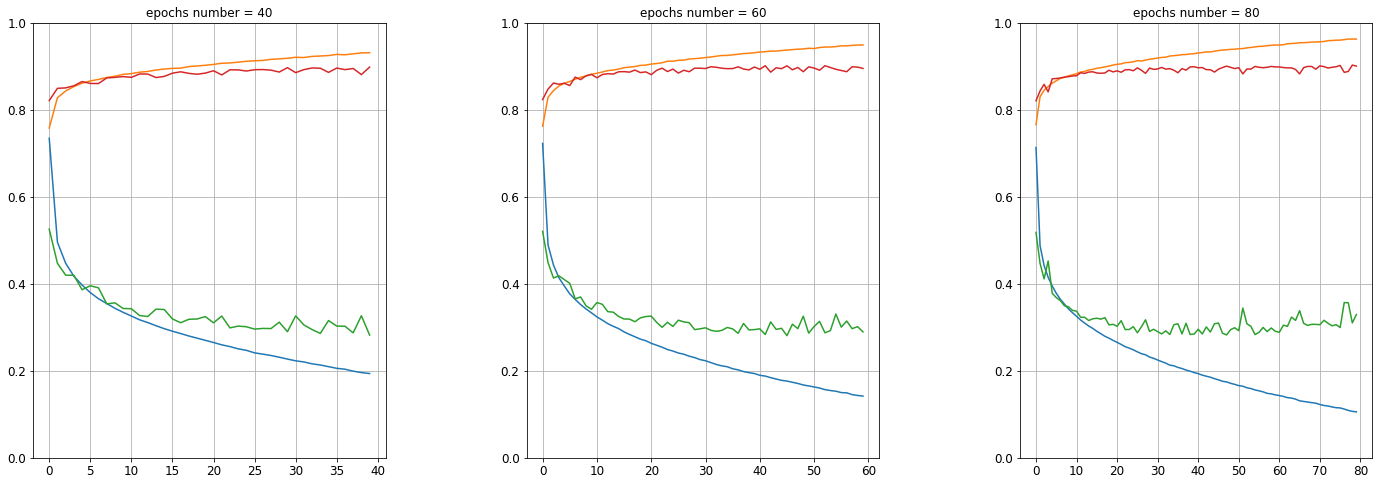

In [108]:
fig = plt.figure(figsize = (24,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    ax.plot(pd.DataFrame(list_history[i-1].history))
    size = 40 + (i-1)*20
    plt.title("epochs number = " + str(size))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7449 - accuracy: 0.7524 - val_loss: 0.5067 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5085 - accuracy: 0.8238 - val_loss: 0.4633 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4577 - accuracy: 0.8381 - val_loss: 0.4345 - val_accuracy: 0.8484
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4236 - accuracy: 0.8504 - val_loss: 0.3942 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4030 - accuracy: 0.8569 - val_loss: 0.3735 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3859 - accuracy: 0.8627 - val_loss: 0.3835 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3702 - accuracy: 0.8676 - val_loss: 0.3540 - val_accuracy:

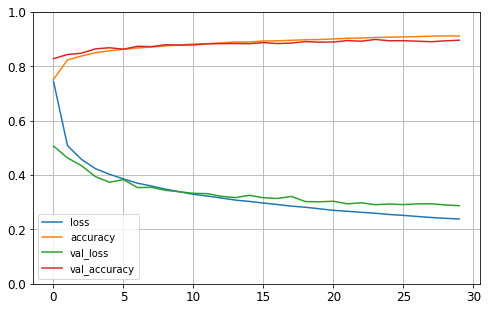

In [110]:
#4
model_ = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

model_.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
history = model_.fit(X_train, y_train, batch_size = 32 , epochs= 30,
                        validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()